# Improve Fashion MNIST using Convolutions.
Hit 99.8% accuracy.

In [11]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

In [124]:
if(tf.version.VERSION >'2.0'):
    accuracy = 'accuracy'
else: # v1.x
    accuracy = 'acc'

def normalize(x):
    return (x-33.32)/222.0

class earlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get(accuracy) >= 0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

    
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
# YOUR CODE SHOULD START HERE
(x_train, x_test) = normalize(x_train), normalize(x_test)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
        
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD END HERE
    global model
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])
    model.summary()

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    global history
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_train, y_train, epochs=10, callbacks=[earlyStop()], shuffle=True, batch_size=600,
        validation_split=0.01
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    # return history.epoch, history.history['acc'][-1]
    return history.epoch, history.history[accuracy][-1]

In [125]:
train_mnist()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 11, 11, 512)       590336    
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               6554112   
_________________________________________________________________
dense_104 (Dense)            (None, 10)              

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 0.99882156)

 <table>
    <tr><td>model</td><td> train accuracy</td><td>test accuracy</td></tr>
    <tr><td>FNN </td><td>0.9917 </td><td>0.9791 </td></tr>
    <tr><td>CNN </td><td>0.9988 </td><td>0.9925 </td></tr>
</table>


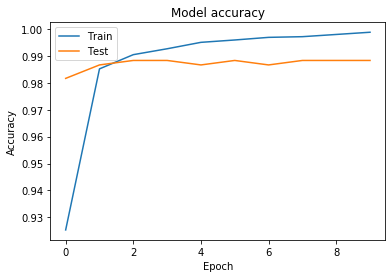

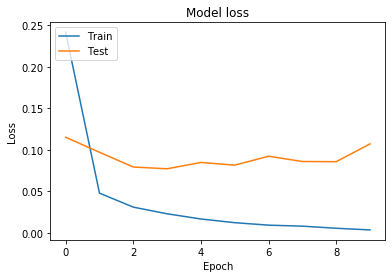

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [129]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 6s - loss: 0.0129 - accuracy: 0.9925


[0.025749647825568673, 0.9925]